# An exploratory popularity analysis of musical genres


Mert Türe  - -    mertture@sabanciuniv.edu

Furkan Akgün  - -    furkanakgun@sabanciuniv.edu

Muhammed Orhun Gale  - -    morhun@sabanciuniv.edu


# **Introduction**



From our perspective, Zeitgeist of the 2020s will be the changes itself. Therefore, in order to keep track of and predict the "popular", analysing the trend and past trends is a must. 

This project is briefly an investigation of how the popularity of genres has changed over years and what sort of changes in the features of the musics bring about this alteration in the music trend. After the correlations are determined, eventually it is aimed to establish a recommendation system that can suggest songs/artists/genres to users sucsesfully.

As the data resourece of this project, we use the [Spotify Dataset 1921-2020 ](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv) dataset. Firstly, we start with exploring it and in previous stages we utilze it to build our system.

The libaries that we use as follows.


In [ ]:
#importing libraries
import sklearn
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
import pandas_profiling as profile_report
import warnings
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings("ignore")

%matplotlib inline

After that, we included the datasets we will use. 

As you will see, we created a merged dataset too and we are including it here.

In [ ]:
#importing drive

from google.colab import drive
drive.mount('/content/drive')

path_prefix = './drive/MyDrive/CS210ProjectDatasets'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataf = "data_b_genres_date.csv"
genresf = "data_by_genres.csv"
genres_w_artistsf = "data_w_genres.csv"


data = pd.read_csv(join(path_prefix, dataf))
genres = pd.read_csv(join(path_prefix, genresf))
genres_w = pd.read_csv(join(path_prefix, genres_w_artistsf))


*   In order to get more familiar with the sets, we checked the elements

*   Artist column had string elements and we changed it to list because some of the songs had multiple artists and by listing we got them all

In [ ]:
a = 0
for i, l in enumerate(data["artists"]):
  a+=1
  if (a == 5):
    break
  print("list",i,"is",type(l))



a = 0
data_artist_str = data.copy()
data["artists"] = data["artists"].apply(eval)
for i, l in enumerate(data["artists"]):
  a+=1
  if (a == 5):
    break
  print("list",i,"is",type(l), l[0])

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 0 is <class 'list'> Mamie Smith
list 1 is <class 'list'> Screamin' Jay Hawkins
list 2 is <class 'list'> Mamie Smith
list 3 is <class 'list'> Oscar Velazquez


**Here, we combined two datasets (data.csv, data_w_genres.csv) by artists column** 

*   In data_w_genres dataset, each artist had their genres list. Hence, we checked the same artists from both data.csv and data_w_genres.csv, then added genres column to data.csv by comparing.



**After Genres column addition, Grouping years by their decades to avoid number of year problem in plotting because it is hard to look every year one by one.**

*   We ran this code block just one time and saved it into our drive because it was running for 5 minutes everytime.




In [ ]:
# genres_data = []

# for element in data["artists"]:
#   index = genres_w[genres_w["artists"] == element[0]].index;
  
#   if len(index) != 0:
#       genres_data.append(genres_w["genres"][index[0]])
#   else:
#     genres_data.append([])

# data["genres"] = genres_data


# data.head()


In [ ]:
#Grouping years by decades

# for element in data["year"]:
#   index = data[data["year"] == element].index
#   data["year"][index[0]] = (element // 10) * 10

# data.to_csv("data_b_genres_date.csv")

In [ ]:
# Wanted to see if there are any missing values but there are not. So, we can continue our analysis.
data.isnull().sum()

Unnamed: 0          0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
genres              0
dtype: int64

We wanted to see genres as elements in a list but we saw that it was a string like "['rock', 'pop']".

With .apply(eval) we made it list and seperated each item.

In [ ]:
a = 0
for i, l in enumerate(data["genres"]):
  a+=1
  if (a == 5):
    break
  print("list",i,"is",type(l))



a = 0
data["genres"] = data["genres"].apply(eval)
for i, l in enumerate(data["genres"]):
  a+=1
  if (a == 5):
    break
  print("list",i,"is",type(l))


list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>


#**Exploratory Data Analysis**

##Visualizations Descriptive Statistics

Started with analysing the general statistics about the data set to see whether there exist significant relations or anomalies.

In [ ]:
genres.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


Wanted to count all genre types but we saw that there are so many different subgenres. Therefore, we are going to use "Top 30" most occured genres which is indicated by having more than 5000 songs.

In [ ]:
# Seperating each item of genres list in each tuple
def to_D(series):
  return pd.Series([x for xList in series for x in xList])

items = to_D(data["genres"])

x = items.value_counts()
genre_Dict_w_songCounts = x.to_dict()


print(x)

total = 0
ctr = 0
moreThanFT = 0

for item in x:
  total = total + item
  ctr = ctr + 1
  if item >= 5000:
    moreThanFT += 1
av = total / ctr



print("\n\nAverage number of songs in genres: " + str(int(av)))

print("\nNumber of genres with more than 5000 songs: " + str(int(moreThanFT)))

rock                     23117
classic rock             17046
adult standards          16431
mellow gold              14111
album rock               12364
                         ...  
synth punk                   1
moravian folk                1
jazz tuba                    1
rock uruguayo                1
atmospheric post-rock        1
Length: 3013, dtype: int64


Average number of songs in genres: 240

Number of genres with more than 5000 songs: 30


Descriptive statistics of the Top 30 occuring Genres

In [ ]:
genres_copy = genres.copy()
genres_copy["number_of_songs"] = genres_copy["genres"].map(genre_Dict_w_songCounts)
genres_copy = genres_copy.set_index("number_of_songs")
genres_copy = genres_copy.sort_index(ascending=False)
print(genres_copy.head(30))


top30PopularityMean = genres_copy["popularity"].head(30).mean()

genres_copy.head(30).describe()

                             genres  acousticness  ...  key  mode
number_of_songs                                    ...           
23117.0                        rock      0.160153  ...    9     1
17046.0                classic rock      0.266788  ...    9     1
16431.0             adult standards      0.621560  ...    7     1
14111.0                 mellow gold      0.319786  ...    7     1
12364.0                  album rock      0.181420  ...    9     1
11808.0                   folk rock      0.411289  ...    7     1
11670.0                   soft rock      0.320664  ...    7     1
11018.0                   classical      0.918070  ...    7     1
10323.0                country rock      0.355055  ...    7     1
9117.0                   vocal jazz      0.740669  ...    5     1
8563.0                         soul      0.400893  ...    0     1
8492.0                       lounge      0.696278  ...    5     1
7918.0                     art rock      0.278000  ...    9     1
7781.0    

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,0.407050,0.544948,250761.890499,0.528203,0.144498,0.199459,-11.031306,0.070546,118.544960,0.540131,33.847171,6.133333,1.0
std,0.239822,0.079011,37691.607908,0.148114,0.134717,0.015752,2.869658,0.039011,5.176539,0.081640,9.673287,2.725782,0.0
min,0.116260,0.318883,172217.883849,0.168496,0.034443,0.174713,-20.595116,0.048368,102.737765,0.229907,15.472150,0.000000,1.0
25%,0.220551,0.509255,231184.257074,0.416411,0.054069,0.188349,-12.202563,0.055747,114.608968,0.495138,29.977152,5.000000,1.0
50%,0.317373,0.527906,245261.041460,0.567071,0.097345,0.196821,-10.615840,0.058432,119.544393,0.553630,34.406795,7.000000,1.0
75%,0.597158,0.566982,269229.857075,0.651647,0.168030,0.212180,-9.796549,0.066101,123.332280,0.587655,36.759377,8.500000,1.0
max,0.918070,0.727313,328699.577600,0.742780,0.566996,0.238242,-6.529611,0.216732,125.703388,0.651633,55.888080,9.000000,1.0


Since our project is "stating" the popularity, we also investigate the "popularity" score that is given by the data set

In [ ]:
genres_copy = genres_copy.set_index("popularity")
genres_copy = genres_copy.sort_index(ascending=False)
print(genres_copy.head(30))
genres_copy.head(30).describe()

                            genres  acousticness  ...  key  mode
popularity                                        ...           
79.000000       chinese electropop      0.002570  ...    1     0
78.000000       korean mask singer      0.238000  ...    9     0
77.000000                     yaoi      0.006550  ...    8     0
77.000000            dutch rap pop      0.216000  ...    5     1
76.000000       rochester mn indie      0.034700  ...    6     1
76.000000                  dong-yo      0.259000  ...    8     1
75.333333                afroswing      0.171333  ...   11     0
75.000000             estonian pop      0.285000  ...   11     1
75.000000                    j-rap      0.096100  ...    6     0
74.625000                irish pop      0.308600  ...    7     1
74.500000         musical advocacy      0.176500  ...    4     1
74.500000          alberta hip hop      0.330000  ...   11     0
74.000000    channel islands indie      0.147000  ...    8     0
74.000000      newcastle 

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.226358,0.637805,214320.760093,0.671319,4.671571e-02,0.149554,-6.364422,0.099254,127.911385,0.504510,6.466667,0.666667
std,0.223945,0.121186,51994.809304,0.190912,1.670276e-01,0.086894,3.314305,0.068530,28.303147,0.251470,2.979624,0.479463
min,0.002570,0.409000,80927.000000,0.088900,0.000000e+00,0.055900,-19.457000,0.026300,79.935000,0.045400,0.000000,0.000000
25%,0.025550,0.570375,188903.750000,0.521344,4.525000e-07,0.088975,-7.620292,0.042325,111.052198,0.275375,5.000000,0.000000
50%,0.180554,0.628500,207428.000000,0.681500,1.407500e-05,0.108250,-6.086700,0.071400,124.486300,0.519167,6.500000,1.000000
75%,0.324650,0.705000,226955.125000,0.804250,5.669060e-03,0.187125,-4.533792,0.143483,141.498250,0.738275,8.000000,1.000000
max,0.988000,0.885000,327967.000000,0.964000,8.970000e-01,0.336000,-1.746000,0.282722,174.141000,0.937000,11.000000,1.000000


Eventually, we find out that mean of popularity score for the first group "Top 30 most occured genres" is 55.8 and for the second group Top 30 most popular genres according to the Popularity given by the data set" is 73.1. 


This result make us to investigate how this "popularity" score is determined. According to the [explanation](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features) that is shared by the Spotify, the popularity is determined by considering total number of plays of a track had and how recent those plays are. Also it is stated that a song that is played a lot recently will have a higher popularity score than a song that was played a lot in the past.


Therefore, we decided that since our project is aiming to analyse popularity and establishing a recommendation system around the possible popular tracks that may the user want to hear, it could be a better idea to keep track of the popularity of songs via considering songs' sound features.

Also, while we exploring, we just wanted to see duration of songs but there are so many outliers so we decided that it will not have a use.

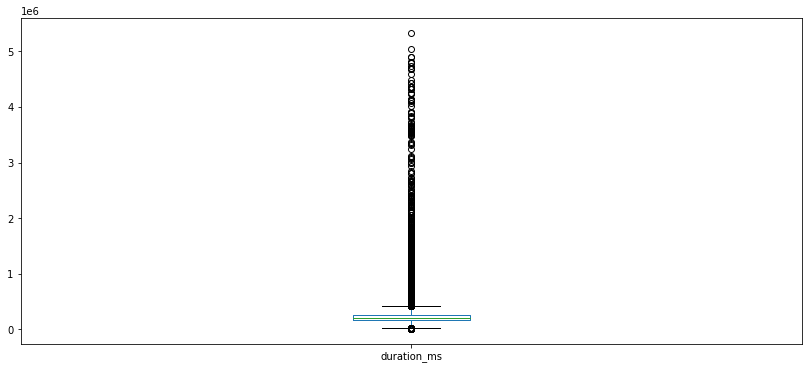

In [ ]:
#df.dtypes
#df.isna().sum()

fig, ax = plt.subplots(1, 1, figsize =(14,6))

data["duration_ms"].plot(kind="box", ax=ax)


##Visualizations of Aggregated Forms Based on Features

**Sharing distribution, mean, median and standard deviations of all the song features are plotted**


*   We plotted 9 different features sharing distributinos, means, medians and std's. ("red" = mean, "blue" = median, "green" = stdeviation)








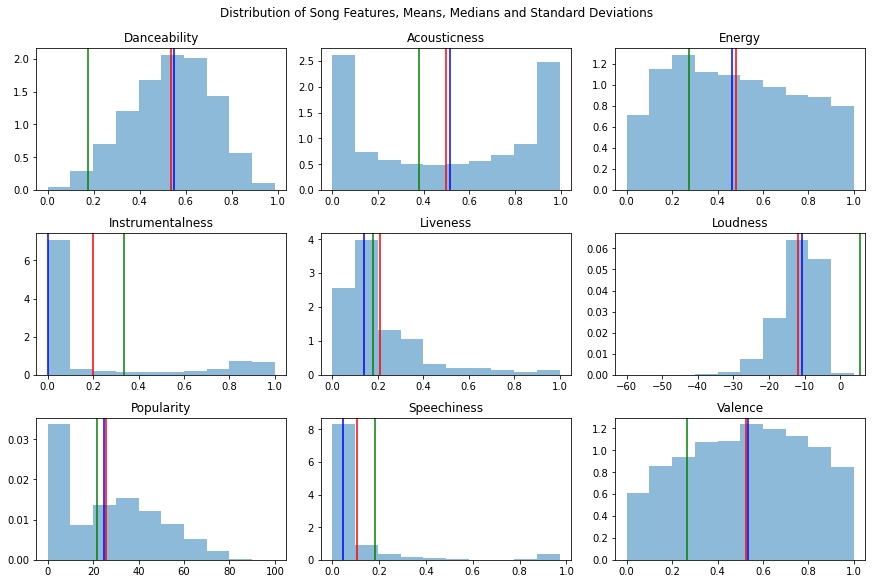

In [ ]:
fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize=(12,8))
fig.suptitle("Distribution of Song Features, Means, Medians and Standard Deviations")


axes[0][0].set_title("Danceability")
axes[0][0].hist(data['danceability'], alpha = 0.5, density = True)
axes[0][0].axvline(data['danceability'].mean(), 0, 1, c = "r")
axes[0][0].axvline(data['danceability'].median(), 0, 1, c = "b")
axes[0][0].axvline(data['danceability'].std(), 0, 1, c = "g")

axes[0][1].set_title("Acousticness")
axes[0][1].hist(data['acousticness'], alpha = 0.5, density = True)
axes[0][1].axvline(data['acousticness'].mean(), 0, 1, c = "r")
axes[0][1].axvline(data['acousticness'].median(), 0, 1, c = "b")
axes[0][1].axvline(data['acousticness'].std(), 0, 1, c = "g")

axes[0][2].set_title("Energy")
axes[0][2].hist(data['energy'], alpha = 0.5, density = True)
axes[0][2].axvline(data['energy'].mean(), 0, 1, c = "r")
axes[0][2].axvline(data['energy'].median(), 0, 1, c = "b")
axes[0][2].axvline(data['energy'].std(), 0, 1, c = "g")

axes[1][0].set_title("Instrumentalness")
axes[1][0].hist(data['instrumentalness'], alpha = 0.5, density = True)
axes[1][0].axvline(data['instrumentalness'].mean(), 0, 1, c = "r")
axes[1][0].axvline(data['instrumentalness'].median(), 0, 1, c = "b")
axes[1][0].axvline(data['instrumentalness'].std(), 0, 1, c = "g")

axes[1][1].set_title("Liveness")
axes[1][1].hist(data['liveness'], alpha = 0.5, density = True)
axes[1][1].axvline(data['liveness'].mean(), 0, 1, c = "r")
axes[1][1].axvline(data['liveness'].median(), 0, 1, c = "b")
axes[1][1].axvline(data['liveness'].std(), 0, 1, c = "g")

axes[1][2].set_title("Loudness")
axes[1][2].hist(data['loudness'], alpha = 0.5, density = True)
axes[1][2].axvline(data['loudness'].mean(), 0, 1, c = "r")
axes[1][2].axvline(data['loudness'].median(), 0, 1, c = "b")
axes[1][2].axvline(data['loudness'].std(), 0, 1, c = "g")

axes[2][0].set_title("Popularity")
axes[2][0].hist(data['popularity'], alpha = 0.5, density = True)
axes[2][0].axvline(data['popularity'].mean(), 0, 1, c = "r")
axes[2][0].axvline(data['popularity'].median(), 0, 1, c = "b")
axes[2][0].axvline(data['popularity'].std(), 0, 1, c = "g")

axes[2][1].set_title("Speechiness")
axes[2][1].hist(data['speechiness'], alpha = 0.5, density = True)
axes[2][1].axvline(data['speechiness'].mean(), 0, 1, c = "r")
axes[2][1].axvline(data['speechiness'].median(), 0, 1, c = "b")
axes[2][1].axvline(data['speechiness'].std(), 0, 1, c = "g")

axes[2][2].set_title("Valence")
axes[2][2].hist(data['valence'], alpha = 0.5, density = True)
axes[2][2].axvline(data['valence'].mean(), 0, 1, c = "r")
axes[2][2].axvline(data['valence'].median(), 0, 1, c = "b")
axes[2][2].axvline(data['valence'].std(), 0, 1, c = "g")

#popularity	speechiness	tempo	valence




plt.show()

**Feature distributing evalution  (ABOVE PLOTS)**

*   **Danceability** is increasing at the middle of dataset and mostly its mean can be seen as normal. Danceability is mostly ~0.6.
*   **Acousticness** frequency is increasing in the lowest and highest numbers in the dataset. Due to that its mean is at the middle but for predicting, it can be misleading.
*   **Energy** is distributed well, it is mostly everywhere but mean is close to lower part.
*   **Instrumentalness** is really low in this dataset. Not so much comment on it.
*   **Liveness** is mostly lower but not the lowest. 
*   **Loudness** can be seen as high mostly, at 0.7 values but its scale is different, -60 to 0 which is like db.
*   **Popularity** will be used in our project at different places. It is important. It is well distributed but mostly close to 0. We did not understand why, will see later.
*   **Speechiness** is very low, not so much comment on it.
*   **Valence** is distributed well and occurred at all the levels closely. Maybe it is distributed as different genres. 0.8-1.0 Valence is Rock and 0.0-0.2 Valence is classical, for instance.





Duration was on miliseconds and we thought it is meaningless. Therefore we changed it to float minutes. Maybe we can use as seconds too. It is better for our graphics.

In [ ]:
# How many different genres there are
print(f"Number of different genre types: {genres['genres'].nunique()}") 

Number of different genre types: 3232


In [ ]:
# Number of different artists in genres
genres_w["artists"].nunique()

32539

In [ ]:
to_D(data["genres"]).value_counts().nlargest(30)

rock                  23117
classic rock          17046
adult standards       16431
mellow gold           14111
album rock            12364
folk rock             11808
soft rock             11670
classical             11018
country rock          10323
vocal jazz             9117
soul                   8563
lounge                 8492
art rock               7918
hard rock              7781
brill building pop     7383
folk                   6879
jazz                   6652
cool jazz              6552
bebop                  6484
psychedelic rock       6284
roots rock             6035
blues rock             5742
dance pop              5575
dance rock             5460
pop                    5442
rap                    5357
permanent wave         5265
funk                   5141
swing                  5098
hip hop                5078
dtype: int64

Loudness scale was from -10 db to -60 db and it was not looking good in plots due to negativity. Hence, we normalized its value by making it 0 to 1.

In [ ]:
loudness = genres[['loudness']].values
min_max = preprocessing.MinMaxScaler()
loudness_scaler = min_max.fit_transform(loudness)
genres['loudness'] = pd.DataFrame(loudness_scaler)


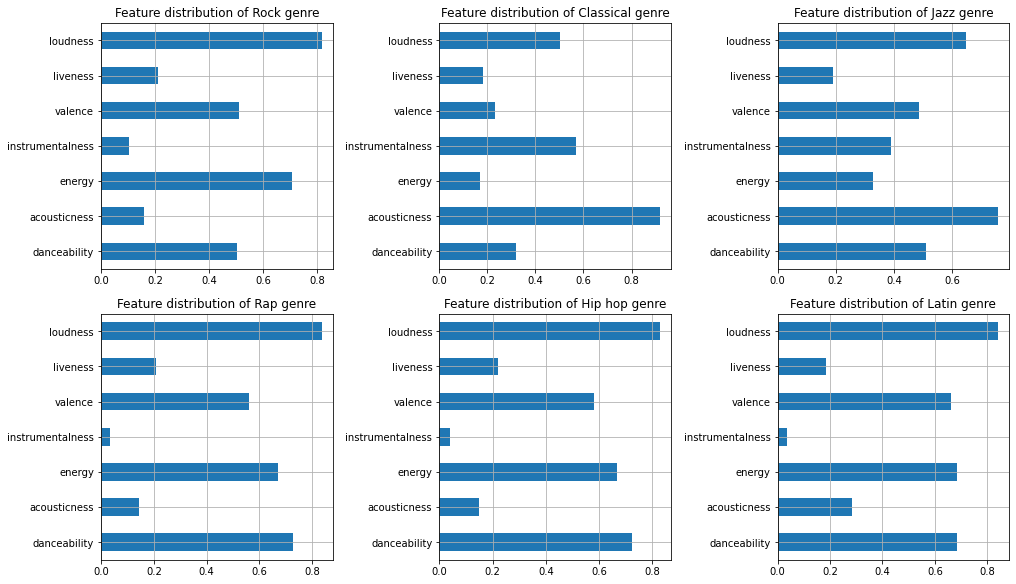

In [ ]:
#genres dataframe is data_by_genres
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(14,8))

genres_feat = genres.set_index("genres")


genres_feat_g = genres_feat.loc["rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][0].set_title("Feature distribution of Rock genre")
genres_feat_g.plot.barh(ax=axes[0,0], grid = True)


genres_feat_g = genres_feat.loc["classical", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][1].set_title("Feature distribution of Classical genre")
genres_feat_g.plot.barh(ax=axes[0,1], grid = True)


genres_feat_g = genres_feat.loc["jazz", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][2].set_title("Feature distribution of Jazz genre")
genres_feat_g.plot.barh(ax=axes[0,2], grid = True)


genres_feat_g = genres_feat.loc["rap", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][0].set_title("Feature distribution of Rap genre")
genres_feat_g.plot.barh(ax=axes[1,0], grid = True)


genres_feat_g = genres_feat.loc["hip hop", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][1].set_title("Feature distribution of Hip hop genre")
genres_feat_g.plot.barh(ax=axes[1,1], grid = True)


genres_feat_g = genres_feat.loc["latin", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][2].set_title("Feature distribution of Latin genre")
genres_feat_g.plot.barh(ax=axes[1,2], grid = True)


Here, we analysed various popular genres. Our findings as follows:

*   As we expected, Classical genre has the highest instrumentalness and acousticness. Also, it has lower danceability.

*   Rap, Hip Hop and Latin genres have high loudness and energy. Hence, their danceability is high too.

*   Contrary to popular belief that Classical and Jazz are very similar genres, we observed that they are differentiate in all features other than instrumentalness and acousticness

*   Rock is analysed elaborately in our next part with its sub-genres.



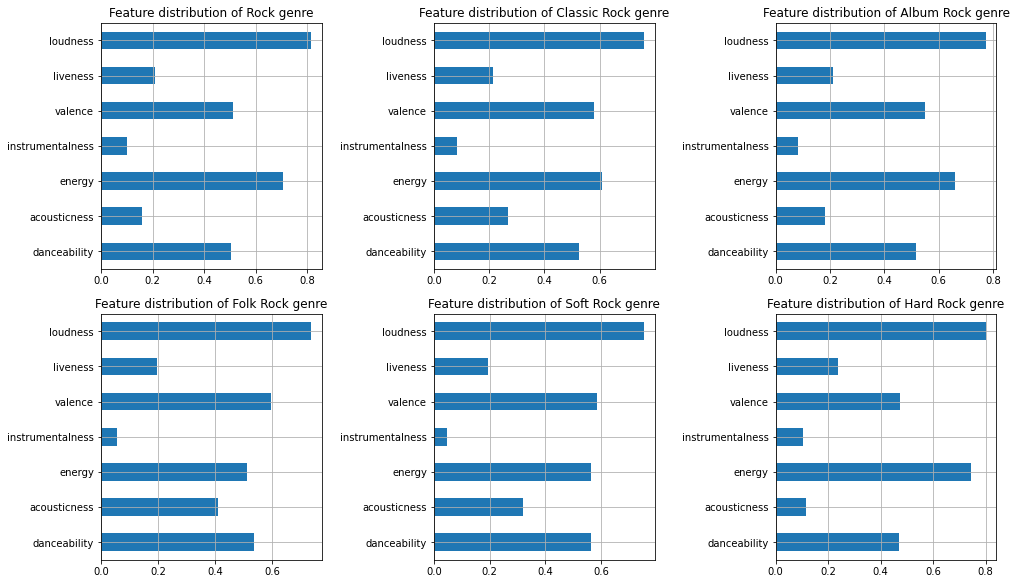

In [ ]:
#genres dataframe is data_by_genres
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(14,8))

genres_feat = genres.set_index("genres")


genres_feat_rock = genres_feat.loc["rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][0].set_title("Feature distribution of Rock genre")
genres_feat_rock.plot.barh(ax=axes[0,0], grid = True)


genres_feat_rock = genres_feat.loc["classic rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][1].set_title("Feature distribution of Classic Rock genre")
genres_feat_rock.plot.barh(ax=axes[0,1], grid = True)


genres_feat_rock = genres_feat.loc["album rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[0][2].set_title("Feature distribution of Album Rock genre")
genres_feat_rock.plot.barh(ax=axes[0,2], grid = True)


genres_feat_rock = genres_feat.loc["folk rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][0].set_title("Feature distribution of Folk Rock genre")
genres_feat_rock.plot.barh(ax=axes[1,0], grid = True)


genres_feat_rock = genres_feat.loc["soft rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][1].set_title("Feature distribution of Soft Rock genre")
genres_feat_rock.plot.barh(ax=axes[1,1], grid = True)


genres_feat_rock = genres_feat.loc["hard rock", ["danceability", "acousticness", "energy", "instrumentalness", "valence", "liveness", "loudness"]]
axes[1][2].set_title("Feature distribution of Hard Rock genre")
genres_feat_rock.plot.barh(ax=axes[1,2], grid = True)


We investigate the sub-genres of Rock. We reached following findings:

*   Since all of them are sub-genres of rock, characteristics match with rock in a great extent.

*   Hard Rock is significantly more energetic than others

*   Folk Rock has significantly more acousticness than others

*   In the confusion matrix that we produced, we observed that instrumentalness and loudness are negatively correlated. We observed this correlation in analysis of Rock sub-genres too.


In [ ]:
#Miliseconds to seconds to minutes
data["duration_ms"] = (data["duration_ms"] // 1000) / 60

We were plotted it at the beginning too but we just wanted to make it for years. It was meaningless again and we will show that in correlation table, duration and year are not correlated really.

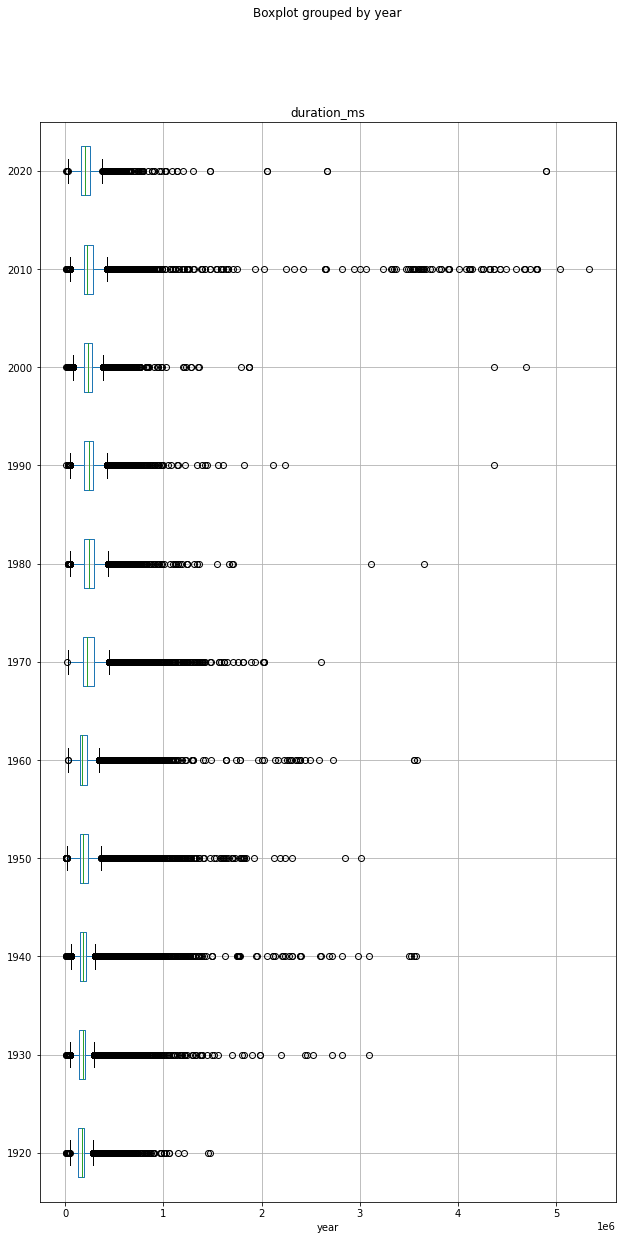

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(10,20))
data.boxplot(column = "duration_ms", by = "year", ax=ax, vert = False)

In [ ]:
# General features of all songs
data.drop(['key','mode','genres','explicit','Unnamed: 0'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration_ms,174389.0,232810.032026,148395.797680,4937.0,166133.0000,205787.000000,265720.0000,5338302.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
popularity,174389.0,25.693381,21.872740,0.0,1.0000,25.000000,42.0000,100.000
speechiness,174389.0,0.105729,0.182260,0.0,0.0352,0.045500,0.0763,0.971
tempo,174389.0,117.006500,30.254178,0.0,93.9310,115.816000,135.0110,243.507


Text(0.5, 0, 'Year')

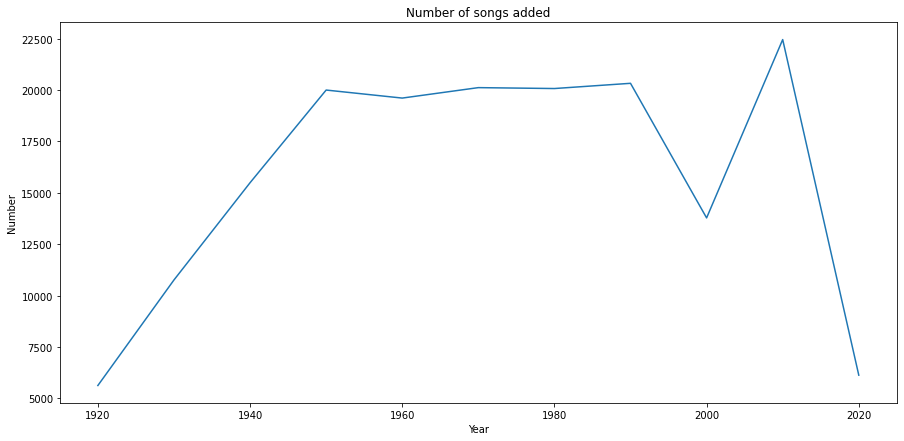

In [ ]:
# Number of songs added per year
plt.figure(figsize=(15, 7))
count = data.groupby("year")["id"].count()
ax= sns.lineplot(count.index,count)
ax.set_title('Number of songs added')
ax.set_ylabel('Number')
ax.set_xlabel('Year')

Unexpectedly, dataset shows that after 2010, number of songs added is decreased significantly. We suspect that it could be a error or a dataset is not updated carefully. 

In [ ]:
# Averages of the features of the songs by year
according_to_year = data[["acousticness","danceability","energy", "instrumentalness", "liveness", 
                "tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year")
according_to_year.head()

,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
year,,,,,,,,,
1920,0.792778,0.585578,0.247832,0.363801,0.211462,110.301210,0.545307,-16.524045,0.296223
1930,0.816473,0.559221,0.279557,0.242277,0.222999,110.918316,0.567892,-15.277442,0.294471
1940,0.872075,0.473930,0.254483,0.365700,0.220712,107.357398,0.488858,-15.318251,0.152771
1950,0.838657,0.478492,0.285336,0.244406,0.210525,110.576868,0.478069,-14.802474,0.104190
1960,0.630583,0.492195,0.411080,0.164533,0.208061,114.999240,0.548013,-12.706971,0.057077


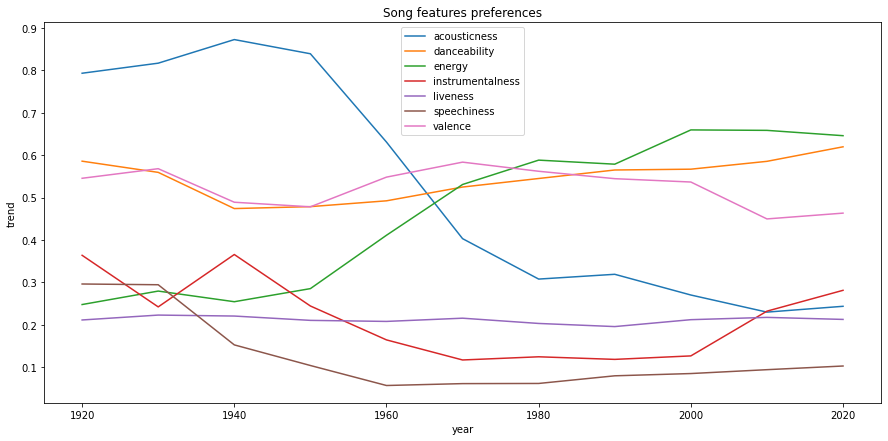

In [ ]:
# Change of the song trends over the years
plt.figure(figsize=(15,7))
plt.title("Song features preferences")
variables = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "speechiness", "valence"]
plt.ylabel("trend")
for variable in variables:
    ax = sns.lineplot(x='year', y=variable, data= according_to_year)
    

plt.legend(variables)

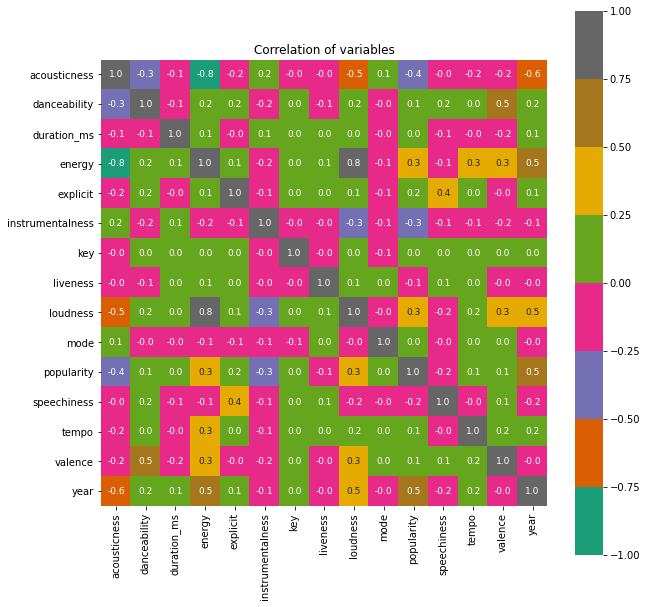

In [ ]:
#In this part, we found the correlations between variables by using heatmap
correlation = data.drop(['Unnamed: 0'],axis=1).corr() 
plt.figure(figsize=(10,10))
plt.title('Correlation of variables')
sns.heatmap(correlation, center=0, vmax=1, vmin=-1, annot = True, annot_kws = {'size':9},fmt='.1f',square=True,  cmap='Dark2')
plt.show()

We set the correlation lower-bound as 0.5. In the following code blocks, found correlations are plotted. 

In [ ]:
# We used this function to show the correlations between variables

def corr_of_var(variable1,variable2,title):
    cor = data[[variable1,variable2]]
    cor["interval"] = pd.cut(data[variable1],np.arange(0,1,0.0001),labels
=[f"{variable1}_{i}" for i in range(1,10000)])
    cor = cor.groupby("interval").median()
    plot = px.scatter(cor,x=variable1, y=variable2)
    plot.update_layout(title_text=title, width=500,
    height=250)
    plot.show()

In [ ]:
# Those are with correlation ratios above 0.5
corr_of_var("acousticness","energy","Acousticness vs Energy")
corr_of_var("acousticness","loudness","Acousticness vs Loudness")
corr_of_var("acousticness","popularity","Acousticness vs Popularity")
#corr_of_var("acousticness","year","Acousticness vs Year")
corr_of_var("valence","danceability","Valence vs Danceability")
corr_of_var("energy","loudness","Energy vs Loudness")
#corr_of_var("energy","year","Energy vs Year")

56th code block's plottings are can be seen at the first time we run however, after some time pass they disappear. If you want to see the correlation, you can try to run or you can check the confusion matrix.

In [ ]:
# We sorted the songs by release time
data["release_date"].index = pd.to_datetime(data["release_date"].index) 
data.drop(['Unnamed: 0'],axis=1).head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.991000,[Mamie Smith],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,"[harlem renaissance, traditional blues]"
1,0.643000,[Screamin' Jay Hawkins],0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,"[blues, traditional blues]"
2,0.993000,[Mamie Smith],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,"[harlem renaissance, traditional blues]"
3,0.000173,[Oscar Velazquez],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,[circuit]
4,0.295000,[Mixe],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,[glitchcore]


##Analysis of the Most Popular Artists and Songs

Top artists with most number of songs.

In [ ]:
data.sort_values(by=['release_date'], inplace=True, ascending=True)

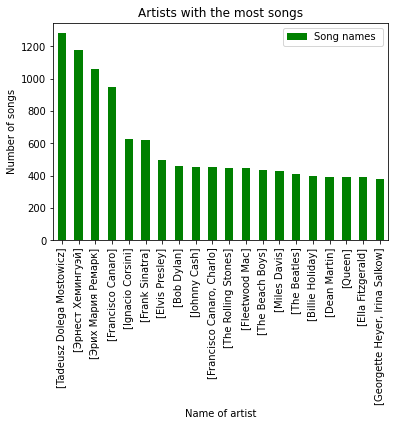

In [ ]:
# We sorted the artists by the number of songs
most20 = pd.DataFrame({'Song names ':data['artists'].value_counts().head(20)})
most20.plot.bar(color='green')
plt.xlabel('Name of artist')
plt.ylabel('Number of songs')
plt.title('Artists with the most songs')
plt.show()

In [ ]:
# Most popular genre types
genres.sort_values("popularity",ascending=False).head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
565,chinese electropop,0.00257,0.660,217088.0,0.787,0.000000,0.3230,-4.592,0.0320,142.018,0.1990,79.0,1,0
1768,korean mask singer,0.23800,0.658,199027.0,0.749,0.000002,0.2720,-2.967,0.0634,128.909,0.4420,78.0,9,0
3213,yaoi,0.00655,0.603,206180.0,0.964,0.000003,0.1430,-2.886,0.0487,135.028,0.7960,77.0,8,0
996,dutch rap pop,0.21600,0.767,192452.0,0.643,0.000104,0.0806,-5.225,0.1010,169.990,0.5360,77.0,5,1
2544,rochester mn indie,0.03470,0.655,205766.0,0.487,0.897000,0.2710,-7.988,0.0330,139.914,0.0454,76.0,6,1


In [ ]:
# First song according to release time
print(data.drop(['Unnamed: 0'],axis=1).iloc[0])

acousticness                                          0.991
artists                                       [Mamie Smith]
danceability                                          0.598
duration_ms                                          168333
energy                                                0.224
explicit                                                  0
id                                   0cS0A1fUEUd1EW3FcF8AEI
instrumentalness                                   0.000522
key                                                       5
liveness                                              0.379
loudness                                            -12.628
mode                                                      0
name                               Keep A Song In Your Soul
popularity                                               12
release_date                                           1920
speechiness                                          0.0936
tempo                                   

In [ ]:
# Last song according to release time
print(data.drop(['Unnamed: 0'],axis=1).iloc[-1]) 

acousticness                                                    0.983
artists             [Mysterious World Music, Relaxing Zen Music En...
danceability                                                    0.775
duration_ms                                                    212198
energy                                                         0.0233
explicit                                                            0
id                                             7fro6vyclNNvph6Hp3AYMt
instrumentalness                                                0.787
key                                                                 6
liveness                                                       0.0656
loudness                                                      -17.366
mode                                                                1
name                                                  Colorful Lights
popularity                                                          0
release_date        

In this part, we tried to find the general characteristics of popular songs and artists and whether there are any similarities they share. The conclusions drawn from this part will be important in determining the characteristics of the ideal and popular songs by the majority of society.

In [ ]:
# Correlation of popularity and other variables (for helping to question of "what makes a song popular"?). 
#Their function is above where we showed the correlation of variables
corr_of_var("acousticness","popularity","Acousticness vs Popularity")
corr_of_var("danceability","popularity","Popularity vs Danceability")
corr_of_var("energy","popularity","Popularity vs Energy")
corr_of_var("instrumentalness","popularity","Popularity vs Instrumentalness")
corr_of_var("liveness","popularity","Popularity vs Liveness")
corr_of_var("speechiness","popularity","Popularity vs Speechiness")	

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

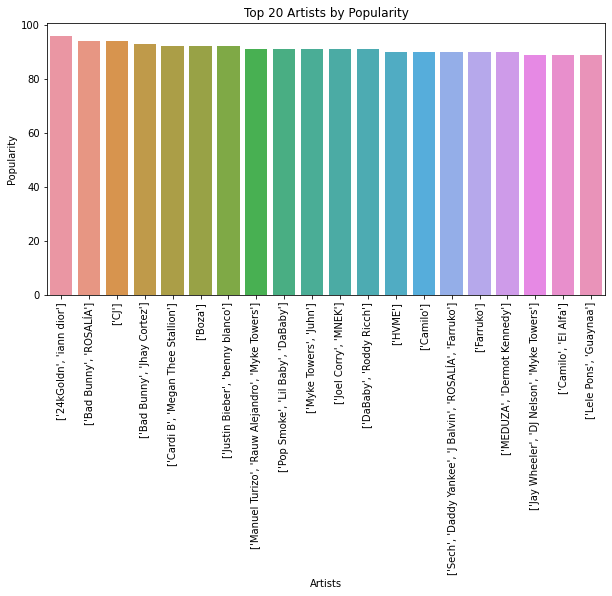

In [ ]:
# Top 20 artists according to popularity ratio (by using the mean)
plt.figure(figsize=(10,5))
x = data_artist_str.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top 20 Artists by Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

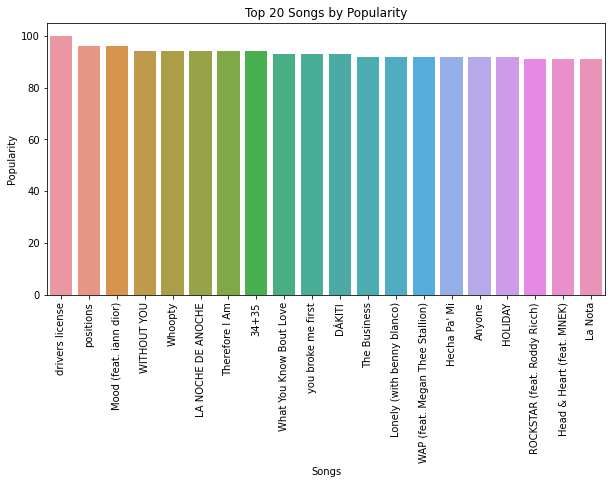

In [ ]:
# Top 20 song names according to popularity ratio 
plt.figure(figsize=(10,5))
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top 20 Songs by Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

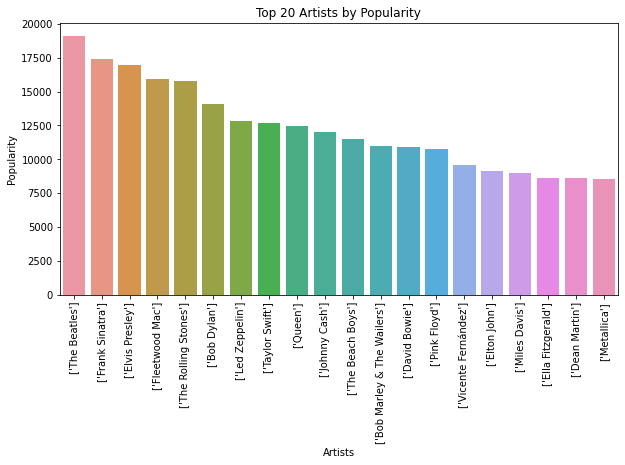

In [ ]:
# Top 20 artists according to popularity ratio (by using the summation)

plt.figure(figsize=(10,5))
x = data_artist_str.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top 20 Artists by Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [ ]:
# Features of the top 50 songs
df = pd.DataFrame() 
number= data.shape[0]
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(50)
for i in range(number):
  if data["name"].iloc[i] in x:
    df = df.append(data.iloc[i], ignore_index=True)
df.drop(['key','mode','genres','explicit','Unnamed: 0'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,53.0,0.282882,0.246006,0.00536,0.0907,0.2130,0.414000,0.934
danceability,53.0,0.731604,0.127105,0.31100,0.6860,0.7360,0.811000,0.965
duration_ms,53.0,189996.113208,31644.803307,119133.00000,167903.0000,190476.0000,208827.000000,261493.000
energy,53.0,0.603717,0.140458,0.23900,0.5180,0.6200,0.704000,0.874
instrumentalness,53.0,0.003316,0.018213,0.00000,0.0000,0.0000,0.000013,0.130
liveness,53.0,0.141372,0.107022,0.04100,0.0848,0.1100,0.150000,0.696
loudness,53.0,-6.277189,2.137618,-10.10900,-7.9560,-6.4760,-4.395000,-2.639
popularity,53.0,90.490566,2.839438,85.00000,89.0000,90.0000,92.000000,100.000
speechiness,53.0,0.131036,0.107756,0.02990,0.0544,0.0878,0.182000,0.389
tempo,53.0,120.908868,31.328567,77.35500,92.0300,115.8840,140.175000,191.900


In [ ]:
# Features of the top 20 artists
df = pd.DataFrame() 
number= data.shape[0]
x = data_artist_str.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20)
for i in range(number):
  if data_artist_str["artists"].iloc[i] in x:
    df = df.append(data.iloc[i], ignore_index=True)
df.drop(['key','mode','genres','explicit','Unnamed: 0'],axis=1).describe().transpose()


,count,mean,std,min,25%,50%,75%,max
acousticness,21.0,0.230914,0.197493,0.0194,0.0907,0.1800,0.325000,0.864000
danceability,21.0,0.764714,0.084564,0.6310,0.7130,0.7360,0.824000,0.935000
duration_ms,21.0,186069.047619,30575.961578,123429.0000,166028.0000,187427.0000,205090.000000,247308.000000
energy,21.0,0.628476,0.132556,0.2390,0.5860,0.6320,0.701000,0.874000
instrumentalness,21.0,0.000082,0.000242,0.0000,0.0000,0.0000,0.000002,0.000917
liveness,21.0,0.143290,0.085611,0.0410,0.0866,0.1130,0.193000,0.349000
loudness,21.0,-5.861952,2.129728,-10.0590,-7.5090,-5.0130,-4.107000,-3.152000
popularity,21.0,91.333333,1.957890,89.0000,90.0000,91.0000,92.000000,96.000000
speechiness,21.0,0.109924,0.090620,0.0369,0.0543,0.0662,0.164000,0.375000
tempo,21.0,112.805476,26.325312,79.8590,90.9890,109.9280,125.971000,171.943000


In [ ]:
## Features of the "The Beatles" which is the top artists/group according to sum method we used above
df = pd.DataFrame() 
number= data.shape[0]
x = data_artist_str.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(1)
for i in range(number):
  if data_artist_str["artists"].iloc[i] in x:
    df = df.append(data.iloc[i], ignore_index=True)
df.drop(['key','mode','genres','explicit','Unnamed: 0'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,412.0,0.359393,0.282487,0.000028,0.10175,0.309000,0.600750,0.977
danceability,412.0,0.522175,0.141315,0.095900,0.41375,0.527000,0.618250,0.915
duration_ms,412.0,174265.048544,59192.001696,25987.000000,139230.00000,162393.000000,196780.250000,502013.000
energy,412.0,0.550661,0.200145,0.012400,0.39500,0.551000,0.716000,0.969
instrumentalness,412.0,0.051694,0.168386,0.000000,0.00000,0.000005,0.000648,0.942
liveness,412.0,0.223856,0.191567,0.037100,0.09770,0.143000,0.293250,0.922
loudness,412.0,-9.636333,2.793593,-23.340000,-11.04350,-9.428500,-7.758250,-3.199
popularity,412.0,46.383495,13.496635,16.000000,38.00000,47.000000,57.000000,82.000
speechiness,412.0,0.053398,0.048582,0.024100,0.03140,0.037900,0.051450,0.516
tempo,412.0,121.686726,27.327067,59.004000,100.46400,121.795000,137.430500,209.242


By observing the means we found for both the most popular 50 songs and the most popular 20 artists, we realised that their features' values are similar. So we can say that preferences of society in general are approximately at the following values:

Acousticness: 0.25 

Danceability: 0.75

Energy: 0.6

Instrumentalness: 0.001

Loudness: - 6

Speechiness: 0.12

Tempo: 115

Valence: 0.5

## How Songs of Different Genres Change Over Time

Changes in features of genres may give a meaningful information about how and why the popularity of them change too. Therefore, we insvestigate these changes by merging and analysing two dataset, "data_w_genres" and "data_by_year".

Since there are many songs over years, in order to understand the relations overally better, we analyse the means of features.

To analyse, we specified 3 genres namely K-Pop, Rock and Classical. The reasons why we selected those are as following:

*   K-pop is a genre that can be considred as started in mid 1990s and become one of the most listening genres in 2010s. Therefore, if we can figure out what K-pop artists have done right, we may get closer to the formul of being "popular" 

*   Rock is the genre that has the most number of songs. Also, it prevailed its popularity for a long time.

*   Classical music is a genre that exists for a really long time. Altough it is not so popular, it never gets old. Therefore, it can be used as a decent reference point. 




#### K-Pop

In [ ]:
#Creating a list that includes rows of songs whose one of genres is Classical

counter = 0

kpop_y = []
for idx, element in data.iterrows():
  if 'k-pop' in element['genres']:
    kpop_y.append(element)
  

kpop_years = pd.DataFrame(kpop_y, columns =['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
                                         'speechiness', 'tempo', 'valence', 'year', 'genres']) 



In [ ]:
#Mean of each feature over years

kpop_years.sort_values(by=['year'], inplace=True, ascending=True)
kpop_years_group = kpop_years.groupby(['year'])

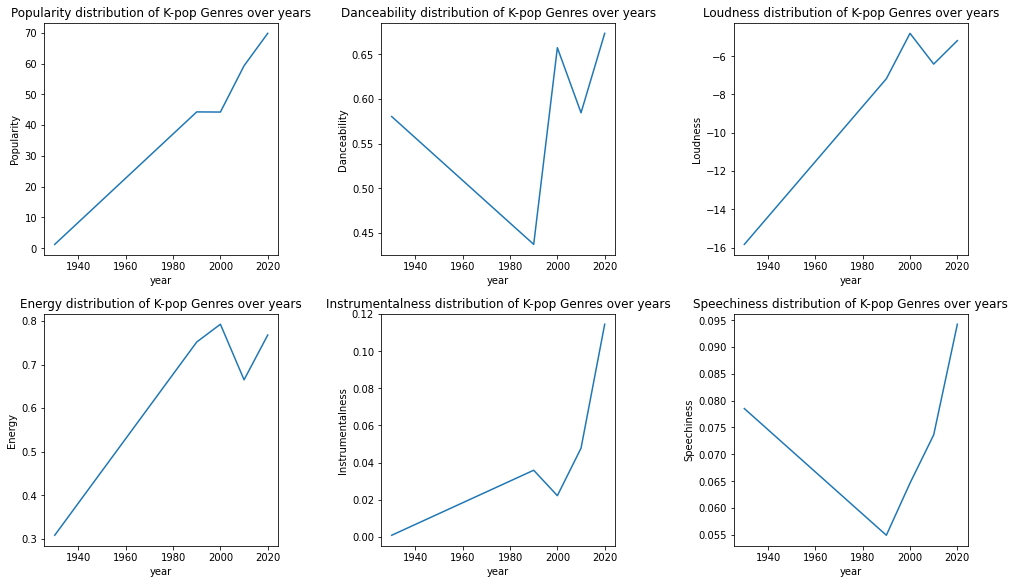

In [ ]:
#K-Pop Feature and Popularity Change Over Time

fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(14,8))


axes[0][0].set_title('Popularity distribution of K-pop Genres over years')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Popularity')
kpop_years_group['popularity'].mean().plot(ax=axes[0,0])

axes[0][1].set_title('Danceability distribution of K-pop Genres over years')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Danceability')
kpop_years_group['danceability'].mean().plot(ax=axes[0,1])

axes[0][2].set_title('Loudness distribution of K-pop Genres over years')
axes[0][2].set_xlabel('Year')
axes[0][2].set_ylabel('Loudness')
kpop_years_group['loudness'].mean().plot(ax=axes[0,2])

axes[1][0].set_title('Energy distribution of K-pop Genres over years')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Energy')
kpop_years_group['energy'].mean().plot(ax=axes[1,0])

axes[1][1].set_title('Instrumentalness distribution of K-pop Genres over years')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Instrumentalness')
kpop_years_group['instrumentalness'].mean().plot(ax=axes[1,1])

axes[1][2].set_title('Speechiness distribution of K-pop Genres over years')
axes[1][2].set_xlabel('Year')
axes[1][2].set_ylabel('Speechiness')
kpop_years_group['speechiness'].mean().plot(ax=axes[1,2])

plt.show()

As we expected, popularity change of K-Pop skyrockets when the time hits to 2010

Therefore, changes in features over time may be interpreted as a meaningful metric while track off the popularity change

#### Rock

In [ ]:
#Creating a list that includes rows of songs whose one of genres is Rock

counter = 0
data.drop(['Unnamed: 0'],axis=1)
rock_y = []
for idx, element in data.iterrows():
  if 'rock' in element['genres']:
    rock_y.append(element)
  

rock_years = pd.DataFrame(rock_y, columns =['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
                                         'speechiness', 'tempo', 'valence', 'year', 'genres']) 




In [ ]:
#Mean of each feature over years

rock_years.sort_values(by=['year'], inplace=True, ascending=True)
rock_years_group = rock_years.groupby(['year'])

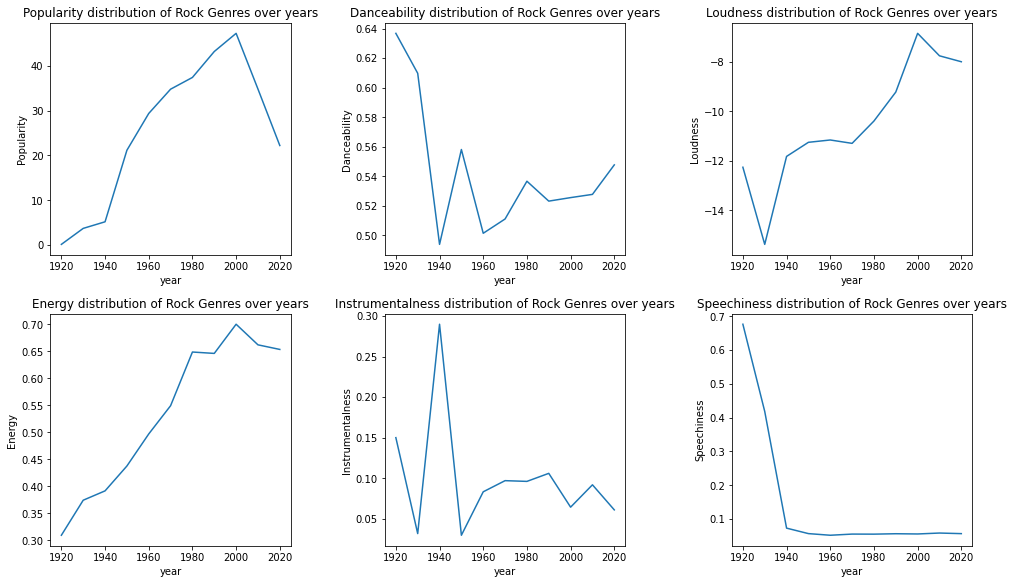

In [ ]:
#Rock Feature and Popularity Change Over Time


fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(14,8))

axes[0][0].set_title('Popularity distribution of Rock Genres over years')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Popularity')
rock_years_group['popularity'].mean().plot(ax=axes[0,0])

axes[0][1].set_title('Danceability distribution of Rock Genres over years')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Danceability')
rock_years_group['danceability'].mean().plot(ax=axes[0,1])

axes[0][2].set_title('Loudness distribution of Rock Genres over years')
axes[0][2].set_xlabel('Year')
axes[0][2].set_ylabel('Loudness')
rock_years_group['loudness'].mean().plot(ax=axes[0,2])

axes[1][0].set_title('Energy distribution of Rock Genres over years')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Energy')
rock_years_group['energy'].mean().plot(ax=axes[1,0])

axes[1][1].set_title('Instrumentalness distribution of Rock Genres over years')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Instrumentalness')
rock_years_group['instrumentalness'].mean().plot(ax=axes[1,1])

axes[1][2].set_title('Speechiness distribution of Rock Genres over years')
axes[1][2].set_xlabel('Year')
axes[1][2].set_ylabel('Speechiness')
rock_years_group['speechiness'].mean().plot(ax=axes[1,2])

plt.show()


As we found from the historical context, popularity of rock is significantly increasing. Also, instrumentalness of this genre had exploded during the II. World War and after that it went down. Moreover, seemingly energy is positively correlated with popularity which can be the reason why it became popular.

#### Classical

In [ ]:
#Creating a list that includes rows of songs whose one of genres is Classical

counter = 0

class_y = []
for idx, element in data.iterrows():
  if 'classical' in element['genres']:
    class_y.append(element)
  

classical_years = pd.DataFrame(class_y, columns =['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
                                         'speechiness', 'tempo', 'valence', 'year', 'genres']) 


In [ ]:
#Mean of each feature over years

classical_years.sort_values(by=['year'], inplace=True, ascending=True)
classical_years_group = classical_years.groupby(['year'])

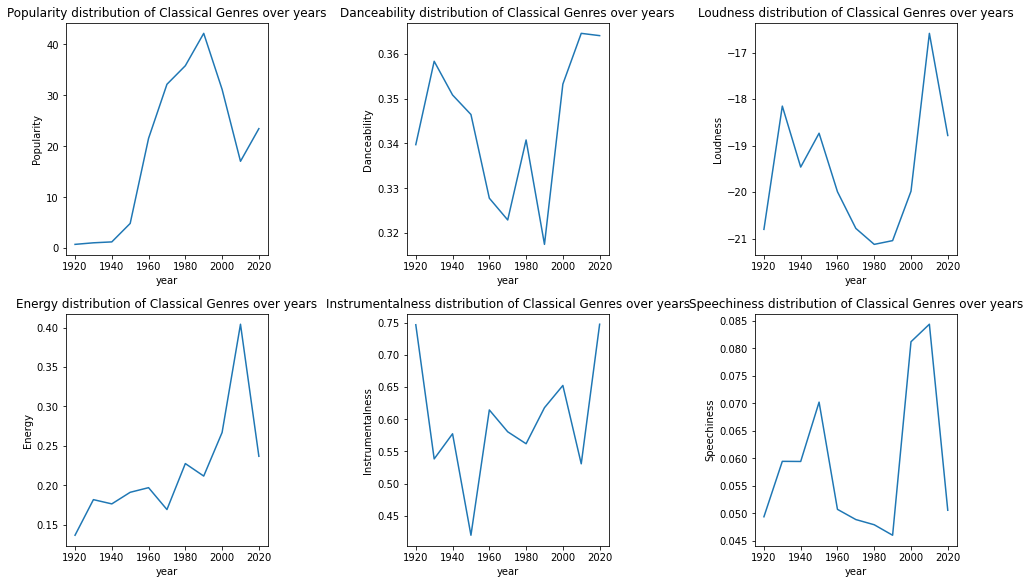

In [ ]:
#Classical's Feature and Popularity Change Over Time
 
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(14,8))

axes[0][0].set_title('Popularity distribution of Classical Genres over years')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Popularity')
classical_years_group['popularity'].mean().plot(ax=axes[0,0])

axes[0][1].set_title('Danceability distribution of Classical Genres over years')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Danceability')
classical_years_group['danceability'].mean().plot(ax=axes[0,1])

axes[0][2].set_title('Loudness distribution of Classical Genres over years')
axes[0][2].set_xlabel('Year')
axes[0][2].set_ylabel('Loudness')
classical_years_group['loudness'].mean().plot(ax=axes[0,2])

axes[1][0].set_title('Energy distribution of Classical Genres over years')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Energy')
classical_years_group['energy'].mean().plot(ax=axes[1,0])

axes[1][1].set_title('Instrumentalness distribution of Classical Genres over years')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Instrumentalness')
classical_years_group['instrumentalness'].mean().plot(ax=axes[1,1])

axes[1][2].set_title('Speechiness distribution of Classical Genres over years')
axes[1][2].set_xlabel('Year')
axes[1][2].set_ylabel('Speechiness')
classical_years_group['speechiness'].mean().plot(ax=axes[1,2])

plt.show()

Classical genre has changed frequently. However, we can say that after 1990 it underwent to a significant transformation in terms of nearly all audio features.

# Recommender System

A very basic recommendation system.

In [ ]:
def euclidean_distance(row1, row2): 
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return math.sqrt(distance)

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for i in range(len(train)):
		dist = euclidean_distance(test_row, train.iloc[i])
		distances.append((train.iloc[i], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
x = input("Row = x,y" )
s = x.split(",")

songs = []
for song in s:
  songs.append(song.strip())
recommended = []

for song in songs:
  song = int(song)
  if len(df) > song:
    track = df.iloc[song] 
    songIndex = track.name 
    recommended.append(songIndex)
    genres_feat = df[df['genres'].apply(lambda x: df.iloc[songIndex]['genres'] in x)]

    if len(tracksdf_genreFilter) > 1: 
      new_df = genres_feat.drop(columns=['artists', 'id', 'name', 'genres', 'release_date']) 
      new_df_t = df.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(new_df, new_df_t.iloc[songIndex], 2) 
                                                                                  
      print("Recommended songs: '" + track['artists'] + " - " + track['name'] + "' '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'])
    else: 
      print("Cannot find anymore songs from this genre but try these!")
      new_df = genres_feat.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      new_df_t = df.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(new_df, new_df_t.iloc[songIndex], 2) 
      print("Recommended songs: '" + track['artists'] + " - " + track['name'] + "' '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'])
  else: 
    print("Does not exist")

featureSums = { 
    'acousticness': 0.0,
    'danceability': 0.0,
    'duration_ms': 0.0,
    'energy': 0.0,
    'instrumentalness': 0.0,
    'liveness': 0.0,
    'loudness': 0.0,
    'popularity': 0.0,
    'speechiness': 0.0,
    'tempo': 0.0,
    'valence': 0.0,
    'year': 0.
}

songRec = df.drop(columns=['artists', 'id', 'name', 'genres', 'release_date', 'key'])

current = 0
existing = 0

for wantedSong in recommended: 
  featureSums['acousticness'] += songRec.iloc[wantedSong]['acousticness']
  featureSums['danceability'] += songRec.iloc[wantedSong]['danceability']
  featureSums['duration_ms'] += songRec.iloc[wantedSong]['duration_ms']
  featureSums['energy'] += songRec.iloc[wantedSong]['energy']
  featureSums['instrumentalness'] += songRec.iloc[wantedSong]['instrumentalness']
  featureSums['liveness'] += songRec.iloc[wantedSong]['liveness']
  featureSums['loudness'] += songRec.iloc[wantedSong]['loudness']
  featureSums['popularity'] += songRec.iloc[wantedSong]['popularity']
  featureSums['speechiness'] += songRec.iloc[wantedSong]['speechiness']
  featureSums['tempo'] += songRec.iloc[wantedSong]['tempo']
  featureSums['valence'] += songRec.iloc[wantedSong]['valence']
  featureSums['year'] += songRec.iloc[wantedSong]['year']
  current += songRec.iloc[wantedSong]['explicit']
  existing += songRec.iloc[wantedSong]['mode']

songQ = { 
    'acousticness': 0,
    'danceability': 0,
    'duration_ms': 0,
    'energy': 0,
    'explicit': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'loudness': 0,
    'mode': 0,
    'popularity': 0,
    'speechiness': 0,
    'tempo': 0,
    'valence': 0,
    'year': 0
}

if (current/len(recommended)) > 1/2: 

if (existing/len(recommended)) > 1/2:
  songQ['mode'] = 1 

songQ['acousticness'] = featureSums['acousticness']/len(recommended)
songQ['danceability'] = featureSums['danceability']/len(recommended)
songQ['duration_ms'] = featureSums['duration_ms']/len(recommended)
songQ['energy'] = featureSums['energy']/len(recommended)
songQ['instrumentalness'] = featureSums['instrumentalness']/len(recommended)
songQ['liveness'] = featureSums['liveness']/len(recommended)
songQ['loudness'] = featureSums['loudness']/len(recommended)
songQ['popularity'] = featureSums['popularity']/len(recommended)
songQ['speechiness'] = featureSums['speechiness']/len(recommended)
songQ['tempo'] = featureSums['tempo']/len(recommended)
songQ['valence'] = featureSums['valence']/len(recommended)
songQ['year'] = featureSums['year']/len(recommended)

fillSong = {
    'acousticness': [songQ['acousticness']],
    'danceability': [songQ['danceability']],
    'duration_ms': [songQ['duration_ms']],
    'energy': [songQ['energy']],
    'explicit': [songQ['explicit']],
    'instrumentalness': [songQ['instrumentalness']],
    'liveness': [songQ['liveness']],
    'loudness': [songQ['loudness']],
    'mode': [songQ['mode']],
    'popularity': [songQ['popularity']],
    'speechiness': [songQ['speechiness']],
    'tempo': [songQ['tempo']],
    'valence': [songQ['valence']],
    'year': [songQ['year']]
}
trackDf = pd.DataFrame(fillSong)

neighbors = get_neighbors(df_new, trackDf.iloc[0], 2)
print("Recommended songs: " + df.iloc[neighbors[1].name]['artists'] + " - " + df.iloc[neighbors[1].name]['name'])
